# Test Deterministic Short-Term Plasticity (STP)

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rootFolder = '/home/fernando/S1_netpyne/sim/'
rootFolder = '/home/fernando/Dropbox/SUNY/2022/S1_netpyne/sim/'

# rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('cell_data/')
folder = sorted(folder)

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/Dropbox/SUNY/2022/S1_netpyne/sim/


In [4]:
# !nrnivmodl mod

In [5]:
def loadTemplateName(cellnumber):     
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[:-1]        
    templatename=templatename[14:]
    return templatename

## Netpyne

In [6]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [9]:
%matplotlib inline

In [10]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 4000.0 						            # Duration of the simulation, in ms
cfg.dt = 0.05								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.1 			
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1234, 'stim': 1234, 'loc': 1234} 
cfg.hParams = {'celsius': 34, 'v_init': -65.0}  
cfg.verbose = True
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.filename = 'model_output'  			# Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	

cfg.analysis['plotTraces'] = {'include': [i for i in range(120)], 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,3600], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre': [0],'includePre': [0], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [12]:
for i,metype in enumerate(folder):
    print(i,metype)

0 L1_DAC_bNAC219_1
1 L1_DAC_bNAC219_2
2 L1_DAC_bNAC219_3
3 L1_DAC_bNAC219_4
4 L1_DAC_bNAC219_5
5 L1_DAC_cNAC187_1
6 L1_DAC_cNAC187_2
7 L1_DAC_cNAC187_3
8 L1_DAC_cNAC187_4
9 L1_DAC_cNAC187_5
10 L1_DLAC_cNAC187_1
11 L1_DLAC_cNAC187_2
12 L1_DLAC_cNAC187_3
13 L1_DLAC_cNAC187_4
14 L1_DLAC_cNAC187_5
15 L1_HAC_bNAC219_1
16 L1_HAC_bNAC219_2
17 L1_HAC_bNAC219_3
18 L1_HAC_bNAC219_4
19 L1_HAC_bNAC219_5
20 L1_HAC_cIR216_1
21 L1_HAC_cIR216_2
22 L1_HAC_cIR216_3
23 L1_HAC_cIR216_4
24 L1_HAC_cIR216_5
25 L1_HAC_cNAC187_1
26 L1_HAC_cNAC187_2
27 L1_HAC_cNAC187_3
28 L1_HAC_cNAC187_4
29 L1_HAC_cNAC187_5
30 L1_NGC-DA_bNAC219_1
31 L1_NGC-DA_bNAC219_2
32 L1_NGC-DA_bNAC219_3
33 L1_NGC-DA_bNAC219_4
34 L1_NGC-DA_bNAC219_5
35 L1_NGC-DA_cACint209_1
36 L1_NGC-DA_cACint209_2
37 L1_NGC-DA_cACint209_3
38 L1_NGC-DA_cACint209_4
39 L1_NGC-DA_cACint209_5
40 L1_NGC-DA_cNAC187_1
41 L1_NGC-DA_cNAC187_2
42 L1_NGC-DA_cNAC187_3
43 L1_NGC-DA_cNAC187_4
44 L1_NGC-DA_cNAC187_5
45 L1_NGC-DA_cSTUT189_1
46 L1_NGC-DA_cSTUT189_2
47 L1_N

In [13]:
cellspostE1 = [170,171,172,173,174]  #  L23_LBC_cACint209
cellspostE2 = [185,186,187,188,189]  #  L23_LBC_dNAC222
cellspostE3 = [1025,1026,1027,1028,1029]  #  L6_TPC_L4_cADpyr231
cellspostI = [265,266,267,268,269]  #  L23_PC_cADpyr229

#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------
#StochKv_deterministic.mod
for cellnumber in cellspostE1+cellspostE2+cellspostE3+cellspostI:
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'cellName': cellName, 'cellTemplateName': cellTemplateName})

NEURON: morphology_d5fa8128ae : a template cannot be redefined
 in morphology.hoc near line 34
 begintemplate morphology_d5fa8128ae
                                   ^
        xopen("morphology.hoc")
      execute1("{xopen("mo...")
    load_file("morphology.hoc")
  xopen("template.hoc")
NEURON: cACint209_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cACint209_biophys
                               ^
        xopen("biophysics.hoc")
      execute1("{xopen("bi...")
    load_file("biophysics.hoc")
  xopen("template.hoc")
NEURON: synapses_d5fa8128ae : a template cannot be redefined
 in synapses.hoc near line 31
 begintemplate synapses_d5fa8128ae                
                                 ^
        xopen("synapses.hoc")
      execute1("{xopen("sy...")
    load_file("synapses/s...")
  xopen("template.hoc")


	0 
	0 
	0 
cACint209_L23_LBC_d5fa8128ae[0]


NEURON: cACint209_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cACint209_biophys
                               ^
        xopen("biophysics.hoc")
NEURON: cACint209_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cACint209_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cACint209_L23_LBC_c6138544ab[0]
	1 
	1 
	1 


NEURON: cACint209_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cACint209_biophys
                               ^
        xopen("biophysics.hoc")


cACint209_L23_LBC_78b571a886[0]
	1 
	1 
	1 


NEURON: cACint209_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cACint209_biophys
                               ^
        xopen("biophysics.hoc")


cACint209_L23_LBC_fece30537a[0]
	1 
	1 
	1 
cACint209_L23_LBC_10ecac904b[0]
	1 
	1 
	1 
dNAC222_L23_LBC_df15689e81[0]


NEURON: dNAC222_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate dNAC222_biophys
                             ^
        xopen("biophysics.hoc")
NEURON: dNAC222_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate dNAC222_biophys
                             ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
dNAC222_L23_LBC_3872d55b42[0]
	1 
	1 
	1 
dNAC222_L23_LBC_936c35a9e1[0]


NEURON: dNAC222_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate dNAC222_biophys
                             ^
        xopen("biophysics.hoc")
NEURON: dNAC222_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate dNAC222_biophys
                             ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
dNAC222_L23_LBC_19cea46eb3[0]
	1 
	1 
	1 
dNAC222_L23_LBC_1b6313448d[0]
	1 
	1 
	1 
cADpyr231_L6_TPC_L4_3f1b0bd478[0]


NEURON: cADpyr231_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr231_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr231_L6_TPC_L4_0cb1e9aa6b[0]


NEURON: cADpyr231_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr231_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr231_L6_TPC_L4_184fd5677b[0]


NEURON: cADpyr231_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr231_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr231_L6_TPC_L4_117b9dfb71[0]


NEURON: cADpyr231_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr231_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr231_L6_TPC_L4_91b667d362[0]
	1 
	1 
	1 
cADpyr229_L23_PC_5ecbf9b163[0]


NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr229_L23_PC_8ef1aa6602[0]


NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
        xopen("biophysics.hoc")
NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
    

	1 
	1 
	1 
cADpyr229_L23_PC_863902f300[0]


    xopen("biophysics.hoc")
NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
        

	1 
	1 
	1 
cADpyr229_L23_PC_c292d67a2e[0]


                       ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr229_L23_PC_c2e79db05a[0]


In [15]:
if cellName + '_a' in netParams.popParams.keys():
    print (cellName + '_a')

In [16]:
for cellnumber in cellspostE1+cellspostE2+cellspostE3:
    # ---------------------------------------------------------------------------------------------------- #
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
    
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
        if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
            print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
            netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'
    # ---------------------------------------------------------------------------------------------------- #
    
    nonSpiny = ['axon_0', 'axon_1']
    netParams.cellParams[cellName]['secLists']['spiny'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpiny]
    nonSpinyEE = ['axon_0', 'axon_1', 'soma']
    netParams.cellParams[cellName]['secLists']['spinyEE'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpinyEE]    
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.popParams[cellName + '_a'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

# ----------------------------------------------------------------------------------------------------------------------------------------------------------- #
for cellnumber in cellspostI:
    # ---------------------------------------------------------------------------------------------------- #
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
    
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
        if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
            print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
            netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'
    # ---------------------------------------------------------------------------------------------------- #
    
    nonSpiny = ['axon_0', 'axon_1']
    netParams.cellParams[cellName]['secLists']['spiny'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpiny]
    nonSpinyEE = ['axon_0', 'axon_1', 'soma']
    netParams.cellParams[cellName]['secLists']['spinyEE'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpinyEE]    
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.popParams[cellName + '_I1_a'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I2_a'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I3_a'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}


L23_LBC_cACint209_1 all soma_0
L23_LBC_cACint209_1 somatic soma_0
L23_LBC_cACint209_2 all soma_0
L23_LBC_cACint209_2 somatic soma_0
L23_LBC_cACint209_3 all soma_0
L23_LBC_cACint209_3 somatic soma_0
L23_LBC_cACint209_4 all soma_0
L23_LBC_cACint209_4 somatic soma_0
L23_LBC_cACint209_5 all soma_0
L23_LBC_cACint209_5 somatic soma_0
L23_LBC_dNAC222_1 all soma_0
L23_LBC_dNAC222_1 somatic soma_0
L23_LBC_dNAC222_2 all soma_0
L23_LBC_dNAC222_2 somatic soma_0
L23_LBC_dNAC222_3 all soma_0
L23_LBC_dNAC222_3 somatic soma_0
L23_LBC_dNAC222_4 all soma_0
L23_LBC_dNAC222_4 somatic soma_0
L23_LBC_dNAC222_5 all soma_0
L23_LBC_dNAC222_5 somatic soma_0
L6_TPC_L4_cADpyr231_1 all soma_0
L6_TPC_L4_cADpyr231_1 somatic soma_0
L6_TPC_L4_cADpyr231_2 all soma_0
L6_TPC_L4_cADpyr231_2 somatic soma_0
L6_TPC_L4_cADpyr231_3 all soma_0
L6_TPC_L4_cADpyr231_3 somatic soma_0
L6_TPC_L4_cADpyr231_4 all soma_0
L6_TPC_L4_cADpyr231_4 somatic soma_0
L6_TPC_L4_cADpyr231_5 all soma_0
L6_TPC_L4_cADpyr231_5 somatic soma_0
L23_PC_cAD

In [17]:
for cellnumber in cellspostE1+cellspostE2+cellspostE3:
    cellName = folder[cellnumber]
    netParams.popParams[cellName + '_b'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}    
for cellnumber in cellspostI:
    cellName = folder[cellnumber]
    netParams.popParams[cellName + '_I1_b'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I2_b'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I3_b'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    
    
for cellnumber in cellspostE1+cellspostE2+cellspostE3:
    cellName = folder[cellnumber]
    netParams.popParams[cellName + '_c'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
for cellnumber in cellspostI:
    cellName = folder[cellnumber]
    netParams.popParams[cellName + '_I1_c'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I2_c'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I3_c'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    
for cellnumber in cellspostE1+cellspostE2+cellspostE3:
    cellName = folder[cellnumber]
    netParams.popParams[cellName + '_d'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
for cellnumber in cellspostI:
    cellName = folder[cellnumber]
    netParams.popParams[cellName + '_I1_d'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I2_d'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    netParams.popParams[cellName + '_I3_d'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

In [18]:
# create custom list of spike times
spkTimes = [500,2500,2550,2600,2650,2700,2750,2800,2850,2900,3400]

netParams.popParams['presyn_a'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times
netParams.popParams['presyn_b'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times
netParams.popParams['presyn_c'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times
netParams.popParams['presyn_d'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times

In [19]:
netParams.cellParams.keys()

odict_keys(['L23_LBC_cACint209_1', 'L23_LBC_cACint209_2', 'L23_LBC_cACint209_3', 'L23_LBC_cACint209_4', 'L23_LBC_cACint209_5', 'L23_LBC_dNAC222_1', 'L23_LBC_dNAC222_2', 'L23_LBC_dNAC222_3', 'L23_LBC_dNAC222_4', 'L23_LBC_dNAC222_5', 'L6_TPC_L4_cADpyr231_1', 'L6_TPC_L4_cADpyr231_2', 'L6_TPC_L4_cADpyr231_3', 'L6_TPC_L4_cADpyr231_4', 'L6_TPC_L4_cADpyr231_5', 'L23_PC_cADpyr229_1', 'L23_PC_cADpyr229_2', 'L23_PC_cADpyr229_3', 'L23_PC_cADpyr229_4', 'L23_PC_cADpyr229_5'])

In [20]:
import pickle
#------------------------------------------------------------------------------
# load data from S1 conn pre-processing file 
#------------------------------------------------------------------------------
with open('../sim/conn/conn.pkl', 'rb') as fileObj: connData = pickle.load(fileObj)

lmat = connData['lmat']
a0mat = connData['a0mat']
d0 = connData['d0']

a0e = connData['a0mat_exp']
l0e = connData['lmat_exp']
d0e = connData['d0_exp']

a0g = connData['a0mat_gauss']
x0g = connData['x0_gauss']
l0g = connData['lmat_gauss']
d0g = connData['d0_gauss']

dfinal = connData['dfinal']
pmat = {}
pmat[12.5] = connData['pmat12um']
pmat[25] = connData['pmat25um']
pmat[50] = connData['pmat50um']
pmat[75] = connData['pmat75um']
pmat[100] = connData['pmat100um']
pmat[125] = connData['pmat125um']
pmat[150] = connData['pmat150um']
pmat[175] = connData['pmat175um']
pmat[200] = connData['pmat200um'] #max value for d0=200

synperconnNumber = connData['synperconnNumber']
connNumber = connData['connNumber']
decay = connData['decay']
gsyn = connData['gsyn']
use = connData['use']

ConnTypesNumber = connData['ConnTypesNumber'] 
ConnTypes = connData['ConnTypes']   

connIEtype = connData['connIEtype']  
connEItype = connData['connEItype']
parameters_syn = connData['parameters_syn']

In [21]:
import pandas as pd

physColumnNames = []
syntypes = []
for name,syntype in parameters_syn:    
    if name not in physColumnNames:
        physColumnNames.append(name) 
    if syntype not in syntypes:
        syntypes.append(syntype)
        
#     print(name,syntype,parameters_syn[name,syntype])
dfS6 = pd.DataFrame(index=syntypes, columns=physColumnNames)
for syntype in syntypes:
    for name in physColumnNames:    
        dfS6.loc[syntype][name] = parameters_syn[name,syntype]
dfS6

,ConnType,gsyn,gsynStd,decay,decayStd,use,useStd,dep,depStd,fac,facStd,s-types,type
0,0,0.83,0.55,10.4,6.1,0.16,0.1,45.0,21.0,376.0,253.0,I1,II
3,1,0.91,0.61,10.4,6.1,0.16,0.1,45.0,21.0,376.0,253.0,I1,IE
13,2,0.75,0.32,10.4,6.1,0.415,0.212,162.0,69.0,690.0,5.0,I1,IE
1,3,0.83,0.55,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,II
4,4,0.91,0.61,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,IE
8,5,0.75,0.32,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,IE
9,6,0.75,0.32,8.3,2.2,0.3,0.08,1250.0,520.0,2.0,4.0,I2,IE
10,7,0.91,0.61,8.3,2.2,0.14,0.05,875.0,285.0,22.0,5.0,I2,IE
12,8,2.97,0.95,8.3,2.2,0.25,0.13,706.0,405.0,21.0,9.0,I2,IE
5,9,0.91,0.61,6.44,1.7,0.32,0.14,144.0,80.0,62.0,31.0,I3,IE


In [22]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from S1 BBP - deterministic version
#------------------------------------------------------------------------------
for syntype in syntypes:
    if syntype > 50:  # Exc
        
        netParams.synMechParams['S1_EE_STP_Det_' + str(syntype)] = {'mod': 'DetAMPANMDA',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype] 
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_AMPA': 1.74, # ± 0.18 ms
                                         'tau_r_AMPA': 0.2, 
                                         'tau_r_NMDA': 0.29,
                                         'tau_d_NMDA': 43,   
                                         'NMDA_ratio': 0.8, # ± 0.1 for EE -- experimentally measured for some paths?
                                         'mg':1.0, #    0.5mM where exceptionally specified?                                                                
                                            }
        netParams.synMechParams['S1_EI_STP_Det_' + str(syntype)] = {'mod': 'DetAMPANMDA',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype] 
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_AMPA': 1.74, # ± 0.18 ms
                                         'tau_r_AMPA': 0.2,
                                         'tau_r_NMDA': 0.29,
                                         'tau_d_NMDA': 43,   
                                         'NMDA_ratio': 0.4, # ± 0.1  for EI -- experimentally measured for some paths?
                                         'mg':1.0, #    0.5mM where exceptionally specified?                                                                
                                            }
    else: # Inh
        
        netParams.synMechParams['S1_II_STP_Det_' + str(syntype)] = {'mod': 'DetGABAAB',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype]  
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_GABAA': dfS6['decay'][syntype], # ± dfS6['decayStd'][syntype]
                                         'tau_r_GABAA': 0.2,   #rng.lognormal(0.2, 0.1) in synapses.hoc  
                                         'tau_d_GABAB': 260.9,
                                         'tau_r_GABAB': 3.5,
#                                          'GABAB_ratio': 1.0,  #=0(1):The ratio of GABAB to GABAA  ?          
                                            }
        
        netParams.synMechParams['S1_IE_STP_Det_' + str(syntype)] = {'mod': 'DetGABAAB',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype]  
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_GABAA': dfS6['decay'][syntype], # ± dfS6['decayStd'][syntype]
                                         'tau_r_GABAA': 0.2,   #rng.lognormal(0.2, 0.1) in synapses.hoc  
                                         'tau_d_GABAB': 260.9,
                                         'tau_r_GABAB': 3.5,
#                                          'GABAB_ratio': 1.0,  #=0(1):The ratio of GABAB to GABAA   ?       
                                            }

In [23]:
netParams.synMechParams.keys()

odict_keys(['S1_II_STP_Det_0', 'S1_IE_STP_Det_0', 'S1_II_STP_Det_3', 'S1_IE_STP_Det_3', 'S1_II_STP_Det_13', 'S1_IE_STP_Det_13', 'S1_II_STP_Det_1', 'S1_IE_STP_Det_1', 'S1_II_STP_Det_4', 'S1_IE_STP_Det_4', 'S1_II_STP_Det_8', 'S1_IE_STP_Det_8', 'S1_II_STP_Det_9', 'S1_IE_STP_Det_9', 'S1_II_STP_Det_10', 'S1_IE_STP_Det_10', 'S1_II_STP_Det_12', 'S1_IE_STP_Det_12', 'S1_II_STP_Det_5', 'S1_IE_STP_Det_5', 'S1_II_STP_Det_11', 'S1_IE_STP_Det_11', 'S1_EE_STP_Det_114', 'S1_EI_STP_Det_114', 'S1_EE_STP_Det_115', 'S1_EI_STP_Det_115', 'S1_EE_STP_Det_132', 'S1_EI_STP_Det_132', 'S1_EE_STP_Det_133', 'S1_EI_STP_Det_133', 'S1_EE_STP_Det_116', 'S1_EI_STP_Det_116', 'S1_EE_STP_Det_117', 'S1_EI_STP_Det_117', 'S1_EE_STP_Det_118', 'S1_EI_STP_Det_118', 'S1_EE_STP_Det_119', 'S1_EI_STP_Det_119', 'S1_EE_STP_Det_120', 'S1_EI_STP_Det_120', 'S1_EE_STP_Det_121', 'S1_EI_STP_Det_121', 'S1_EE_STP_Det_122', 'S1_EI_STP_Det_122', 'S1_EE_STP_Det_123', 'S1_EI_STP_Det_123', 'S1_EE_STP_Det_127', 'S1_EI_STP_Det_127', 'S1_EE_STP_Det_1

In [24]:
netParams.synMechParams['S1_EI_STP_Det_134']

{'mod': 'DetAMPANMDA',
 'Use': 0.72,
 'Dep': 227.0,
 'Fac': 14.0,
 'tau_d_AMPA': 1.74,
 'tau_r_AMPA': 0.2,
 'tau_r_NMDA': 0.29,
 'tau_d_NMDA': 43,
 'NMDA_ratio': 0.4,
 'mg': 1.0}

In [25]:
netParams.synMechParams['S1_EE_STP_Det_126']

{'mod': 'DetAMPANMDA',
 'Use': 0.21,
 'Dep': 460.0,
 'Fac': 230.0,
 'tau_d_AMPA': 1.74,
 'tau_r_AMPA': 0.2,
 'tau_r_NMDA': 0.29,
 'tau_d_NMDA': 43,
 'NMDA_ratio': 0.8,
 'mg': 1.0}

In [26]:
print((synperconnNumber['L23_PC']['L23_LBC']),(synperconnNumber['L6_TPC_L4']['L6_TPC_L4']),(synperconnNumber['L23_SBC']['L23_PC']))

9.0 5.0 22.0


In [27]:
## Cell connectivity rules

synList = {}
synperconnList = {}

#E1 -> syn 115
synList[115] = [] # 'L23_PC:L23_LBC_cAC'
for post in list(netParams.popParams.keys()):
    if 'L23_LBC_cAC' in post:
        synList[115].append(post)
        synperconnList[115] = 9
#E2 -> syn 134
synList[134] = [] #  'L23_PC:L23_LBC_dNAC'
for post in list(netParams.popParams.keys()):
    if 'L23_LBC_dNAC' in post:
        synList[134].append(post)
        synperconnList[134] = 9
#E3 -> syn 126
synList[126] = [] # 'L6_TPC_L4:L6_TPC_L4'
for post in list(netParams.popParams.keys()):
    if 'L6_TPC_L4' in post:
        synList[126].append(post)
        synperconnList[126] = 5

#I1 -> syn 3
synList[3] = [] # ' 'L23_SBC_cAC:L23_PC'
for post in list(netParams.popParams.keys()):
    if 'I1' in post:
        synList[3].append(post)
        synperconnList[3] = 22
#I2 -> syn 4
synList[4] = [] # ' 'L23_SBC_dNAC:L23_PC'
for post in list(netParams.popParams.keys()):
    if 'I2' in post:
        synList[4].append(post)
        synperconnList[4] = 22
#I3 -> syn 5
synList[5] = [] # ' 'L23_SBC_bNAC:L23_PC'
for post in list(netParams.popParams.keys()):
    if 'I3' in post:
        synList[5].append(post)
        synperconnList[5] = 22


for syntype in [3,4,5,115,134,126]:
    
    if syntype == 126:  # Exc:Exc   
        synapseMech = 'S1_EE_STP_Det_' + str(syntype)   
    elif syntype > 50:  # Exc     
        synapseMech = 'S1_EI_STP_Det_' + str(syntype)             
    else: # Inh
        synapseMech = 'S1_IE_STP_Det_' + str(syntype)   
        
    netParams.connParams['STP_Det_a_' + str(syntype)] = { 
            'preConds': {'pop': 'presyn_a'},
            'postConds': {'pop': synList[syntype][0:5]},
            'sec': ['dend_0','dend_1','dend_2','dend_3'],                  # target postsyn section
            'synMech': synapseMech,              # target synaptic mechanism
            'weight': dfS6['gsyn'][syntype],                 # synaptic weight 
            'synsPerConn': synperconnList[syntype],
            'delay': 0.1}   
    netParams.connParams['STP_Det_b_' + str(syntype)] = { 
            'preConds': {'pop': 'presyn_b'},
            'postConds': {'pop': synList[syntype][5:10]},
            'sec': 'spinyEE', # ['dend_4','dend_5','dend_6','dend_7'],                  # target postsyn section
            'synMech': synapseMech,              # target synaptic mechanism
            'weight': dfS6['gsyn'][syntype],                 # synaptic weight 
            'synsPerConn': synperconnList[syntype],
            'delay': 0.1}   
    netParams.connParams['STP_Det_c_' + str(syntype)] = { 
            'preConds': {'pop': 'presyn_c'},
            'postConds': {'pop': synList[syntype][10:15]},
            'sec': 'basal', # ['dend_8','dend_9','dend_10','dend_11'],                  # target postsyn section
            'synMech': synapseMech,              # target synaptic mechanism
            'weight': dfS6['gsyn'][syntype],                 # synaptic weight 
            'synsPerConn': synperconnList[syntype],
            'delay': 0.1}   
    netParams.connParams['STP_Det_d_' + str(syntype)] = { 
            'preConds': {'pop': 'presyn_d'},
            'postConds': {'pop': synList[syntype][15:20]},
            'sec': ['dend_12','dend_13','dend_14','dend_15'],                  # target postsyn section
            'synMech': synapseMech,              # target synaptic mechanism
            'weight': dfS6['gsyn'][syntype],                 # synaptic weight 
            'synsPerConn': synperconnList[syntype],
            'delay': 0.1}             

In [28]:
netParams.connParams

{STP_Det_a_3: {'preConds': {'pop': 'presyn_a'}, 'postConds': {'pop': ['L23_PC_cADpyr229_1_I1_a', 'L23_PC_cADpyr229_2_I1_a', 'L23_PC_cADpyr229_3_I1_a', 'L23_PC_cADpyr229_4_I1_a', 'L23_PC_cADpyr229_5_I1_a']}, 'sec': ['dend_0', 'dend_1', 'dend_2', 'dend_3'], 'synMech': 'S1_IE_STP_Det_3', 'weight': 0.91, 'synsPerConn': 22, 'delay': 0.1}, STP_Det_b_3: {'preConds': {'pop': 'presyn_b'}, 'postConds': {'pop': ['L23_PC_cADpyr229_1_I1_b', 'L23_PC_cADpyr229_2_I1_b', 'L23_PC_cADpyr229_3_I1_b', 'L23_PC_cADpyr229_4_I1_b', 'L23_PC_cADpyr229_5_I1_b']}, 'sec': 'spinyEE', 'synMech': 'S1_IE_STP_Det_3', 'weight': 0.91, 'synsPerConn': 22, 'delay': 0.1}, STP_Det_c_3: {'preConds': {'pop': 'presyn_c'}, 'postConds': {'pop': ['L23_PC_cADpyr229_1_I1_c', 'L23_PC_cADpyr229_2_I1_c', 'L23_PC_cADpyr229_3_I1_c', 'L23_PC_cADpyr229_4_I1_c', 'L23_PC_cADpyr229_5_I1_c']}, 'sec': 'basal', 'synMech': 'S1_IE_STP_Det_3', 'weight': 0.91, 'synsPerConn': 22, 'delay': 0.1}, STP_Det_d_3: {'preConds': {'pop': 'presyn_d'}, 'postConds'

In [29]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2023-04-10 17:01:35.821307

Creating network of 124 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop L23_LBC_cACint209_1_a, on node 0, 
Instantiated 1 cells of population L23_LBC_cACint209_1_a
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=1) of pop L23_LBC_cACint209_2_a, on node 0, 
Instantiated 1 cells of population L23_LBC_cACint209_2_a
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=2) of pop L23_LBC_cACint209_3_a, on node 0, 
Instantiated 1 cells of population L23_LBC_cACint209_3_a
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=3) of pop L23_LBC_cACint209_4_a, on node 0, 
Instantiated 1 cells of population L23_LBC_cACint209_4_a
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=4) of pop L23_LBC_cACint209_5_a, on node 0, 
Instantiated 1 cells of population L23_LBC_cACint209_5_a
Dis

Cell 0/0 (gid=45) of pop L23_PC_cADpyr229_1_I1_b, on node 0, 
Instantiated 1 cells of population L23_PC_cADpyr229_1_I1_b
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=46) of pop L23_PC_cADpyr229_1_I2_b, on node 0, 
Instantiated 1 cells of population L23_PC_cADpyr229_1_I2_b
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=47) of pop L23_PC_cADpyr229_1_I3_b, on node 0, 
Instantiated 1 cells of population L23_PC_cADpyr229_1_I3_b
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=48) of pop L23_PC_cADpyr229_2_I1_b, on node 0, 
Instantiated 1 cells of population L23_PC_cADpyr229_2_I1_b
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=49) of pop L23_PC_cADpyr229_2_I2_b, on node 0, 
Instantiated 1 cells of population L23_PC_cADpyr229_2_I2_b
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=50) of pop L23_PC_cADpyr229_2_I3_b, on node 0, 
Instantiated 

Cell 0/0 (gid=100) of pop L6_TPC_L4_cADpyr231_1_d, on node 0, 
Instantiated 1 cells of population L6_TPC_L4_cADpyr231_1_d
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=101) of pop L6_TPC_L4_cADpyr231_2_d, on node 0, 
Instantiated 1 cells of population L6_TPC_L4_cADpyr231_2_d
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=102) of pop L6_TPC_L4_cADpyr231_3_d, on node 0, 
Instantiated 1 cells of population L6_TPC_L4_cADpyr231_3_d
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=103) of pop L6_TPC_L4_cADpyr231_4_d, on node 0, 
Instantiated 1 cells of population L6_TPC_L4_cADpyr231_4_d
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=104) of pop L6_TPC_L4_cADpyr231_5_d, on node 0, 
Instantiated 1 cells of population L6_TPC_L4_cADpyr231_5_d
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=105) of pop L23_PC_cADpyr229_1_I1_d, on node 0, 
Instant

  Created connection preGid=120, postGid=23, sec=dend_2, loc=0.5743, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_2, loc=0.4803, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_2, loc=0.3863, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_2, loc=0.2923, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_2, loc=0.1983, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_2, loc=0.1043, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_2, loc=0.0103, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_3, loc=0.9052, synMech=S1_IE_STP_Det_5, weight=0.91, delay=0.10
  Created connection preGid=120, postGid=23, sec=dend_3,

{spkt: Vector[252765], spkid: Vector[252766], V_soma: {cell_0: Vector[252767], cell_1: Vector[252768], cell_2: Vector[252769], cell_3: Vector[252770], cell_4: Vector[252771], cell_5: Vector[252772], cell_6: Vector[252773], cell_7: Vector[252774], cell_8: Vector[252775], cell_9: Vector[252776], cell_10: Vector[252777], cell_11: Vector[252778], cell_12: Vector[252779], cell_13: Vector[252780], cell_14: Vector[252781], cell_15: Vector[252782], cell_16: Vector[252783], cell_17: Vector[252784], cell_18: Vector[252785], cell_19: Vector[252786], cell_20: Vector[252787], cell_21: Vector[252788], cell_22: Vector[252789], cell_23: Vector[252790], cell_24: Vector[252791], cell_25: Vector[252792], cell_26: Vector[252793], cell_27: Vector[252794], cell_28: Vector[252795], cell_29: Vector[252796], cell_30: Vector[252797], cell_31: Vector[252798], cell_32: Vector[252799], cell_33: Vector[252800], cell_34: Vector[252801], cell_35: Vector[252802], cell_36: Vector[252803], cell_37: Vector[252804], cell_

In [ ]:
sim.runSim()                      			# run parallel Neuron simulation  


Setting h global variables ...
  h.celsius = 34
  h.v_init = -65.0
  h.tstop = 4000.0
Minimum delay (time-step for queue exchange) is 10.00
0.0s

Running simulation using NEURON for 4000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s



Gathering data...
  Done; gather time = 0.18 s.

Analyzing...
  Cells: 124
  Connections: 120 (0.97 per cell)
  Synaptic contacts: 1780 (14.35 per cell)
  Spikes: 44 (0.09 Hz)
  Simulated time: 4.0 s; 1 workers
  Run time: 1963.38 s
  Done; saving time = 0.02 s.
Plotting recorded cell traces ... trace


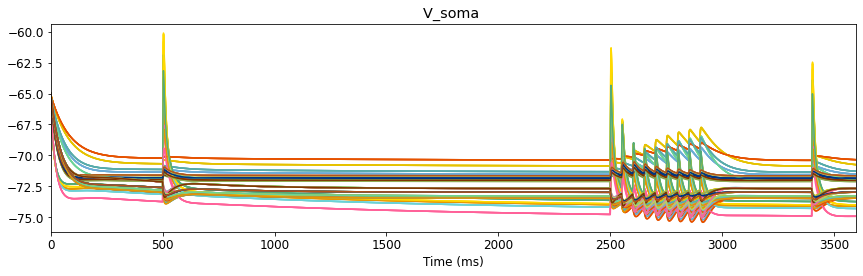

  Done; plotting time = 1.23 s

Total time = 1967.80 s

End time:  2021-10-21 21:00:48.475636


In [27]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

Plotting recorded cell traces ... trace
Saving figure data as ../info/test/syn/syn_eletrophys_all.json ... 


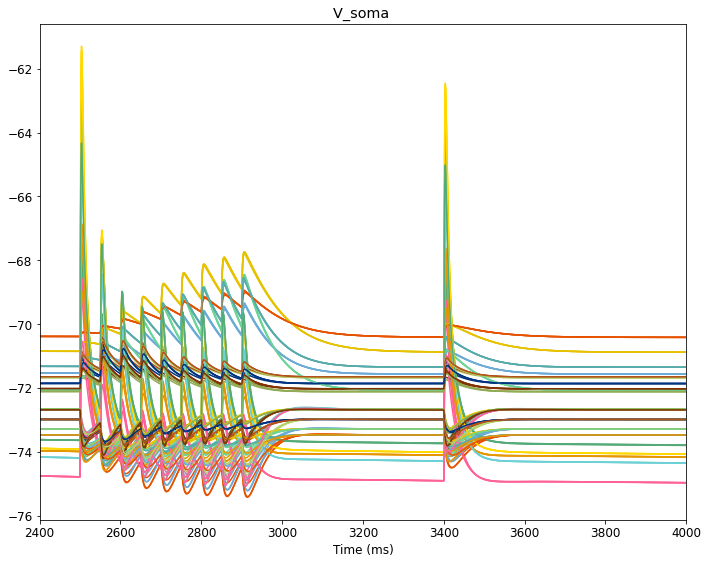

In [28]:
Traces2 = sim.analysis.plotTraces(oneFigPer='trace', overlay=1, timeRange=[2400,4000], saveData='../info/test/syn/syn_eletrophys_all.json')

In [29]:
# import json
# Traces2 = {}
# with open('../info/test/syn/syn_eletrophys_all.json', 'r') as f:
#     Traces2[1] = json.load(f) 

In [30]:
# alltraces = []
# for number in range(20):
#     alltraces.append(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])

In [31]:
sim.net.allCells[5+6]['conns']

[{preGid: 120, sec: 'dend_1', loc: 0.8058838094851144, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_a_126'},
 {preGid: 120, sec: 'dend_1', loc: 0.3578875325654556, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_a_126'},
 {preGid: 120, sec: 'dend_2', loc: 0.4074793775397835, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_a_126'},
 {preGid: 120, sec: 'dend_3', loc: 0.6351419182804355, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_a_126'},
 {preGid: 120, sec: 'dend_3', loc: 0.21171397276014536, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_a_126'}]

In [32]:
sim.net.allCells[35+6]['conns']

[{preGid: 121, sec: 'dend_10', loc: 0.26560308115631714, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_b_126'},
 {preGid: 121, sec: 'dend_36', loc: 0.284896458828752, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_b_126'},
 {preGid: 121, sec: 'apic_17', loc: 0.8477389933768189, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_b_126'},
 {preGid: 121, sec: 'apic_27', loc: 0.8099284606575549, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_b_126'},
 {preGid: 121, sec: 'apic_35', loc: 0.14351014378391613, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_b_126'}]

In [33]:
sim.net.allCells[65+6]['conns']

[{preGid: 122, sec: 'dend_3', loc: 0.09082564087787404, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_c_126'},
 {preGid: 122, sec: 'dend_10', loc: 0.16266438020830126, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_c_126'},
 {preGid: 122, sec: 'dend_21', loc: 0.9091021032567701, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_c_126'},
 {preGid: 122, sec: 'dend_25', loc: 0.07774049775412387, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_c_126'},
 {preGid: 122, sec: 'dend_38', loc: 0.960445445646973, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_c_126'}]

In [34]:
sim.net.allCells[95+6]['conns']

[{preGid: 123, sec: 'dend_12', loc: 0.7636541861966151, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_d_126'},
 {preGid: 123, sec: 'dend_12', loc: 0.2909625585898453, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_d_126'},
 {preGid: 123, sec: 'dend_13', loc: 0.697992497594337, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_d_126'},
 {preGid: 123, sec: 'dend_14', loc: 0.920303954582353, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_d_126'},
 {preGid: 123, sec: 'dend_14', loc: 0.20525148548566413, synMech: 'S1_EE_STP_Det_126', weight: 0.8, delay: 0.1, label: 'STP_Det_d_126'}]

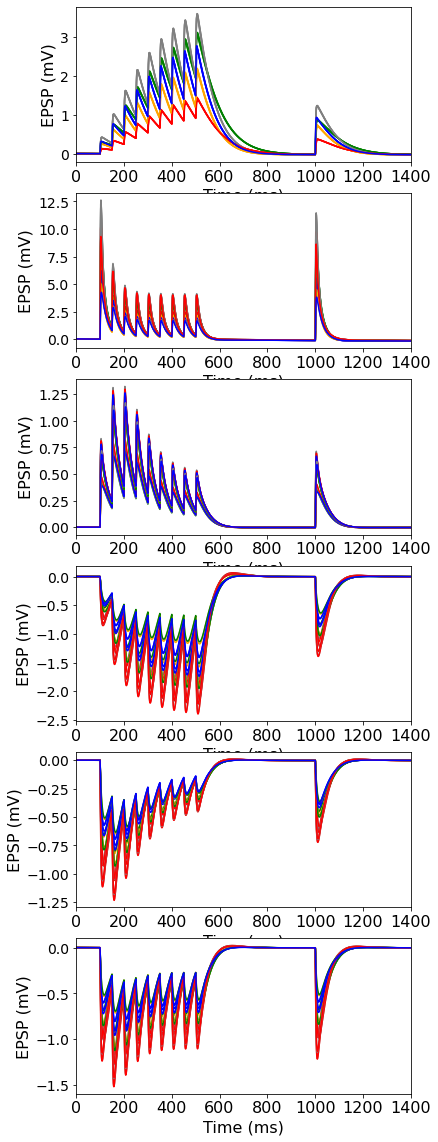

In [58]:
figSize = (6,20)
fig = plt.figure(figsize=figSize)  # Open a new figure
clr = ["orange","green","gray", "red", "blue"]

cellpostrules = ['L23_LBC_cAC','L23_LBC_dNAC','L6_TPC_L4','I1','I2','I3']

for i,cellpostrule in enumerate(cellpostrules):
    plt.subplot(6, 1, i+1)
    for number in range(120):     
        if cellpostrule in sim.net.allCells[number]['tags']['pop']:
            if sim.net.allCells[number]['tags']['pop'].split('_')[-2] in ['1', '2', '3', '4', '5']:
                colorNum = int(sim.net.allCells[number]['tags']['pop'].split('_')[-2])
            else:
                colorNum = int(sim.net.allCells[number]['tags']['pop'].split('_')[-3])
            plt.plot(np.array(Traces2[1]['tracesData'][number]['t'][1:]),
                     np.array(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'][999], 
                     label= sim.net.allCells[number]['tags']['pop'] + '_' + sim.net.allCells[number]['conns'][0]['sec'], color=clr[colorNum-1], linewidth=1.5) #, alpha=0.5, color=clr[i]

    plt.xlim(2400,3650)
#     plt.ylim(-15.25,12.25)
    plt.xlabel('Time (ms)', fontsize=16)
    plt.ylabel('EPSP (mV)', fontsize=16)
    plt.xticks(range(2400,3900,200), range(0,1500,200), fontsize=16);
    plt.yticks(fontsize=14);

#     plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.85), fontsize=7)
plt.savefig('../info/test/syn/syn_eletrophys_20Hz_EI.png', facecolor = 'white' , dpi=300)
 